# Clustering Crypto

In [12]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Deliverable 1: Preprocessing the Data for PCA

In [13]:
# Load the crypto_data.csv dataset.
df = pd.read_csv('data/crypto_data.csv',index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [14]:
# Keep all the cryptocurrencies that are being traded.
traded_df =  df[df['IsTrading'] == True]
traded_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [15]:
# Keep all the cryptocurrencies that have a working algorithm.
traded_algo_df = traded_df[(traded_df['Algorithm'] != 'N/A')]
traded_algo_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [16]:
# Remove the "IsTrading" column. 
traded_algo_df.drop(columns=['IsTrading'], inplace=True)
traded_algo_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [17]:
# Remove rows that have at least 1 null value.
traded_algo_df.dropna(inplace=True)
traded_algo_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [18]:
# Keep the rows where coins are mined.
crypto_df = traded_algo_df[traded_algo_df['TotalCoinsMined'] > 0]
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [19]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_name_df= crypto_df[['CoinName']]
crypto_name_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [20]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(columns=['CoinName'], axis=1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [21]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [26]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca_df = pca.fit_transform(X_scaled)
crypto_pca_df

array([[-0.3363247 ,  1.06398269, -0.57638932],
       [-0.31966154,  1.0642146 , -0.57685628],
       [ 2.30290036,  1.75734252, -0.65732133],
       ...,
       [ 0.3183125 , -2.33378958,  0.44794678],
       [-0.14340434, -2.01497476,  0.37514968],
       [-0.28972751,  0.70975074, -0.24942084]])

In [27]:
# Create a DataFrame with the three principal components.
pca_df = pd.DataFrame(crypto_pca_df, columns=["PC 1", "PC 2", "PC 3"], index=X.index)
pca_df.head(10)

,PC 1,PC 2,PC 3
42,-0.336325,1.063983,-0.576389
404,-0.319662,1.064215,-0.576856
1337,2.302900,1.757343,-0.657321
BTC,-0.142247,-1.312556,0.180663
ETH,-0.148747,-2.006723,0.416843
LTC,-0.168885,-1.106149,0.002126
DASH,-0.389534,1.286252,-0.521915
XMR,-0.144888,-2.131467,0.466511
ETC,-0.147190,-2.006814,0.416822
ZEC,-0.143403,-2.014975,0.375150


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [29]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
   km = KMeans(n_clusters=i, random_state=0)
   km.fit(pca_df)
   inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [33]:
# Initialize the K-Means model.
crypto_model_df = KMeans(n_clusters=4, random_state=0)

# Fit the model
crypto_model_df.fit(pca_df)

# Predict clusters
predictions = crypto_model_df.predict(pca_df)
print(predictions)

[0 0 0 3 3 3 0 3 3 3 0 3 0 0 3 0 3 3 0 0 3 3 3 3 3 0 3 3 3 0 3 0 3 3 0 0 3
 3 3 3 3 3 0 0 3 3 3 3 3 0 0 3 0 3 3 3 3 0 3 3 0 3 0 0 0 3 3 3 0 0 0 0 0 3
 3 3 0 0 3 0 3 0 0 3 3 3 3 0 0 3 0 3 3 0 0 3 0 0 3 3 0 0 3 0 0 3 0 3 0 3 0
 3 0 0 3 3 0 3 3 3 0 3 3 3 3 3 0 0 3 3 3 0 3 0 3 3 0 3 0 3 0 0 3 3 0 3 3 0
 0 3 0 3 0 0 0 3 3 3 3 0 0 0 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 3 0 3 0 0 3 0 3
 0 0 3 0 3 0 3 0 3 0 0 0 0 3 0 0 0 0 0 3 3 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 3 3 3 0 0 0 0 3 0 3 0 0 3 0 3 3 0 3 3 0 3 0 0 0 3 0 0 3
 0 0 0 0 0 0 0 3 0 3 0 0 0 0 3 0 3 0 3 3 3 3 0 3 0 0 3 0 3 3 3 0 3 0 3 3 3
 0 3 0 3 0 0 1 3 0 3 3 3 3 3 0 0 3 0 0 0 3 0 3 0 3 0 3 0 0 0 0 3 0 0 3 0 0
 0 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 3 3 0 0 3 0 3 3 3 0 3 3 0 0 0 3 3 3 0 3 0
 3 3 0 3 3 3 3 0 1 1 3 3 3 0 1 0 0 0 0 3 3 3 3 0 0 0 3 0 3 0 0 0 0 3 0 0 3
 0 0 3 3 0 3 0 3 3 3 3 0 0 3 0 3 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 3 0 3 3 3 3
 0 0 0 0 3 0 0 3 0 0 3 1 3 0 3 3 0 0 3 0 3 3 3 3 3 0 3 0 3 0 0 3 0 0 0 0 0
 3 3 3 0 0 0 3 0 3 0 3 0 

In [34]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pca_df], axis=1)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = crypto_name_df

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.336325,1.063983,-0.576389,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.319662,1.064215,-0.576856,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.302900,1.757343,-0.657321,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.142247,-1.312556,0.180663,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.148747,-2.006723,0.416843,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.168885,-1.106149,0.002126,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.389534,1.286252,-0.521915,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.144888,-2.131467,0.466511,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.147190,-2.006814,0.416822,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.143403,-2.014975,0.375150,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

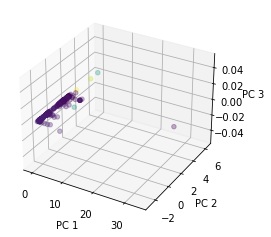

In [38]:
# Creating a 3D-Scatter with the PCA data and the clusters
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the values
ax.scatter(
    clustered_df['PC 1'], 
    clustered_df['PC 2'], 
    c=clustered_df['PC 3'], 
    cmap='viridis', alpha=0.3
    )
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

In [40]:
# Create a table with tradable cryptocurrencies.
tradable = clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 
                                              'TotalCoinsMined', 'Class'], sortable=True, selectable=True)
tradable

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [41]:
# Print the total number of tradable cryptocurrencies.
tradable_count = clustered_df['CoinName'].count()
print(f"There are {tradable_count} tradable cryptocurrencies.")

There are 532 tradable cryptocurrencies.


In [42]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scaled_df = MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply", "TotalCoinsMined"]])
scaled_df

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [43]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data = scaled_df, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df = pd.concat([plot_df, clustered_df['CoinName']], axis=1)

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df = pd.concat([plot_df, clustered_df['Class']], axis=1)

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,3
ETH,0.000000e+00,0.000109,Ethereum,3
LTC,8.400000e-05,0.000064,Litecoin,3
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,3
ETC,2.100000e-04,0.000115,Ethereum Classic,3
ZEC,2.100000e-05,0.000007,ZCash,3


In [44]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x='TotalCoinsMined',
    y='TotalCoinSupply',
    hover=['CoinName'],
    by='Class')

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)